## Laiko eilučių analizė ir prognozavimas
##### Karolis Banikonis MGDVDAM-2 2023-11-XX
##### Tikslas: analizuoti laiko eilutes.
##### Užduotis 1: atlikti žvalgomąją duomenų analizę laiko eilutėms.
##### Užduotis 2: nustatyti ar viena laiko eilutė daro įtaką kitai su Grangerio priežastingumu.
##### Užduotis 3: prognozuoti laiko eilučių reikšmes metus į priekį.

In [1]:
import yfinance
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
import pandas as pd

In [30]:
class Ts():
    
    def __init__(self):
        self.data = None

    def __init__(self, ticker, s_date, e_date):
        self.set_time_series(ticker, s_date, e_date)

    def set_time_series(self, ticker, s_date, e_date):
        data = yfinance.Ticker(ticker).history(start=s_date, end=e_date)
        data.rename(columns = {"Close": ticker}, inplace = True)
        self.data = data[ticker]

    def describe(self):
        if self.data is not None:
            print("Trukstamų reikšmių kiekis:", self.data.isna().sum())
            print(self.data.describe())

    def plot_ts(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.data.index, self.data)
        plt.xlabel('Laikotarpis')
        plt.ylabel('USD') #PASITIKRINTI
        plt.title(f"{self.data.name} laiko eilutė")
        plt.show()
        
    def differentiate(self, threshold):
        i = 0
        while i < 2:
            i += 1
            stationary = adfuller(self.data)
            if stationary[1] > threshold:
                print(f'{self.data.name} laiko eilutė nėra stacionari, atliekamas diferencijavimas {i} kartą.')
                self.data = self.data - self.data.shift(1)
                self.data = self.data.iloc[1:]
            else:
                print(f'{self.data.name} laiko eilutė yra stacionari.')
                break

def granger_Ts(Ts1, Ts2, threshold, test = 'ssr_ftest', lags = 10):
    df = pd.concat([Ts1.data, Ts2.data], axis=1)
    granger = grangercausalitytests(df[[Ts1.data.name, Ts2.data.name]], maxlag = lags, verbose=False)
    for key in granger.keys():
        v = granger[key][0][test]
        if v[1] > threshold:
            print(f"Vėlavimas = {key}, p-reikšmė = {v[1]}, {Ts2.data.name} nedaro įtakos {Ts1.data.name}.")
        else:
            print(f"Vėlavimas = {key}, p-reikšmė = {v[1]}, {Ts2.data.name} daro įtaką {Ts1.data.name}.")

### Duomenų nuskaitymas

In [ ]:
def get_data_from_yahoo(ticker, s_date, e_date):
    data = yfinance.Ticker(ticker).history(start=s_date, end=e_date)
    data.rename(columns = {"Close": ticker}, inplace = True)
    return data[ticker]

In [15]:
ticker1 = "FUJHY"
ticker2 = "TM"
s_date = "2021-01-01"
e_date = "2023-01-01"
threshold = 0.05

In [21]:
Subaru_Ts = Ts(ticker1, s_date, e_date)
Toyota_Ts = Ts(ticker2, s_date, e_date)

### Užduotis 1. Žvalgomoji analizė

In [12]:
Subaru_Ts.describe()
Toyota_Ts.describe()

Trukstamų reikšmių kiekis: 0
count    503.00000
mean       9.00670
std        0.82779
min        7.09000
25%        8.32000
50%        9.20000
75%        9.68000
max       10.47000
Name: FUJHY, dtype: float64
Trukstamų reikšmių kiekis: 0
count    503.000000
mean     164.685467
std       17.477034
min      130.289993
25%      152.235001
50%      162.779999
75%      179.275002
max      211.369995
Name: TM, dtype: float64


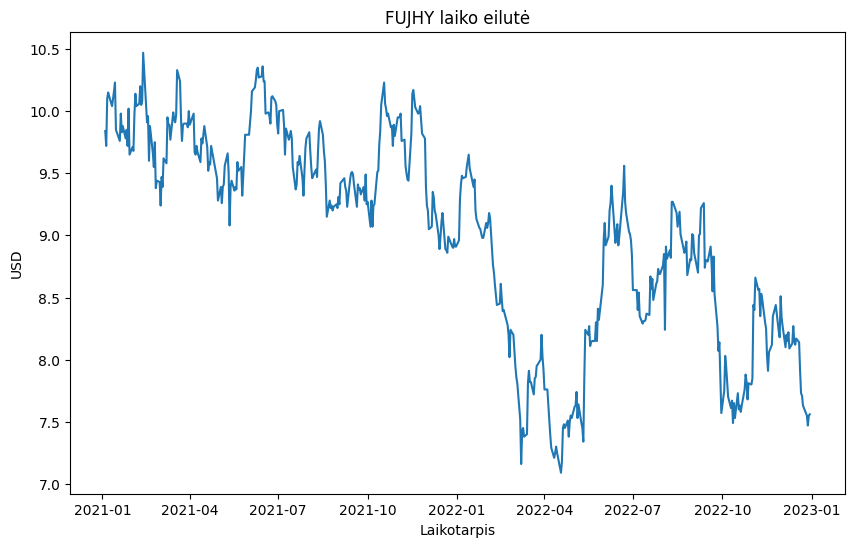

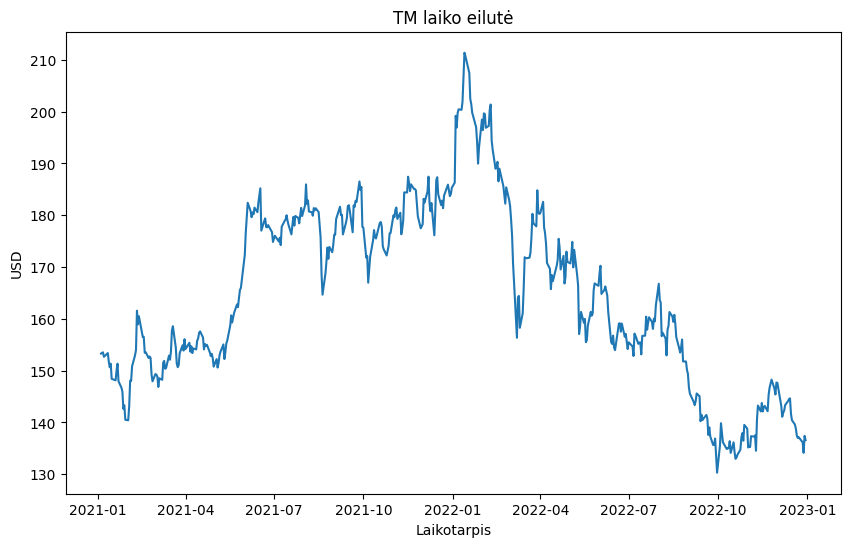

In [19]:
Subaru_Ts.plot_ts()
Toyota_Ts.plot_ts()

In [ ]:
def calculate_log_returns(data):
    ret = np.log(data).diff()
    ret = ret.iloc[1:]
    return ret

### Užduotis 2. Granger priežastingumo analizė

In [22]:
Subaru_Ts.differentiate(threshold)
Toyota_Ts.differentiate(threshold)

FUJHY laiko eilutė nėra stacionari, atliekamas diferencijavimas 1 kartą.
FUJHY laiko eilutė yra stacionari.
TM laiko eilutė nėra stacionari, atliekamas diferencijavimas 1 kartą.
TM laiko eilutė yra stacionari.


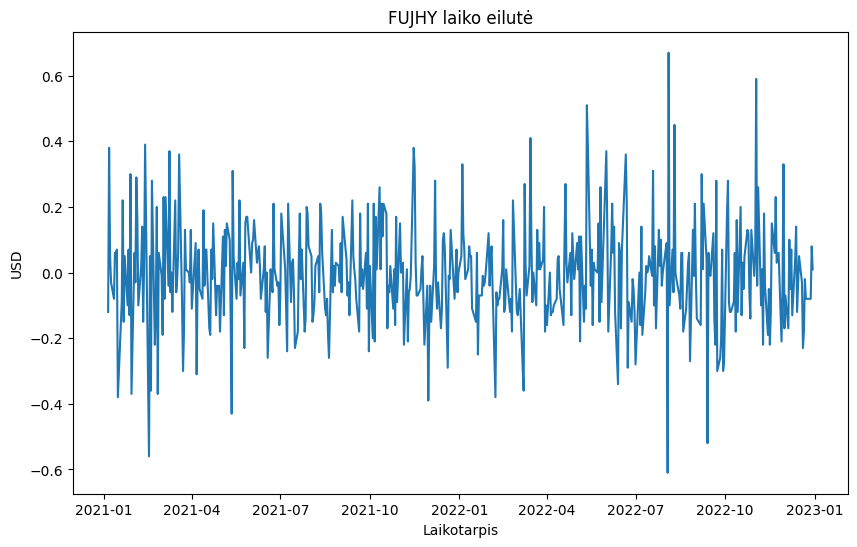

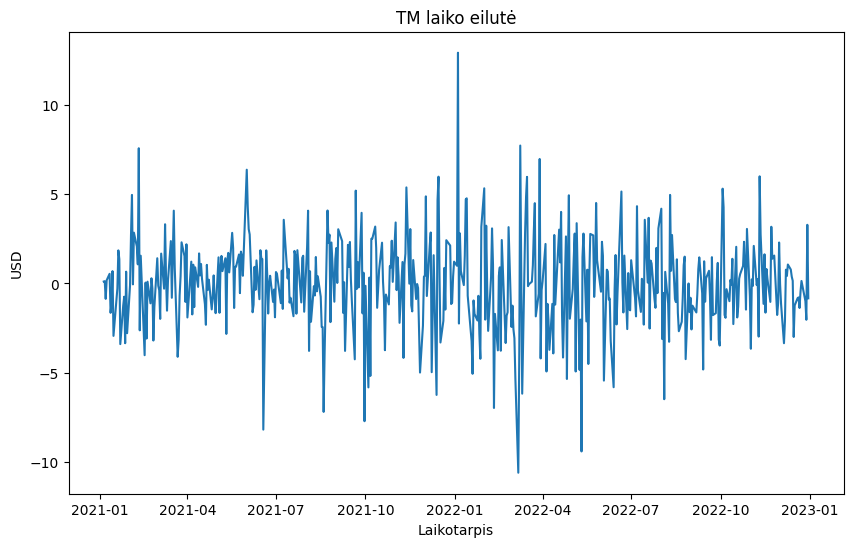

In [23]:
Subaru_Ts.plot_ts()
Toyota_Ts.plot_ts()

In [31]:
granger_Ts(Subaru_Ts, Toyota_Ts, threshold)


Rezultatai lag'ui = 1:
p-reikšmė = 0.08445283196920172, TM nedaro įtakos FUJHY.
Rezultatai lag'ui = 2:
p-reikšmė = 0.20303514743969336, TM nedaro įtakos FUJHY.
Rezultatai lag'ui = 3:
p-reikšmė = 0.34858869252364244, TM nedaro įtakos FUJHY.
Rezultatai lag'ui = 4:
p-reikšmė = 0.511332798052901, TM nedaro įtakos FUJHY.
Rezultatai lag'ui = 5:
p-reikšmė = 0.5072149164656278, TM nedaro įtakos FUJHY.
Rezultatai lag'ui = 6:
p-reikšmė = 0.6351469978485133, TM nedaro įtakos FUJHY.
Rezultatai lag'ui = 7:
p-reikšmė = 0.6939425924629203, TM nedaro įtakos FUJHY.
Rezultatai lag'ui = 8:
p-reikšmė = 0.7862912477499497, TM nedaro įtakos FUJHY.
Rezultatai lag'ui = 9:
p-reikšmė = 0.8342589561236773, TM nedaro įtakos FUJHY.
Rezultatai lag'ui = 10:
p-reikšmė = 0.8924707040076643, TM nedaro įtakos FUJHY.
